In [1]:
# Decision Tree
# Previous data/collection of data-> feature -> 
# We find out Entropy
# The Decision tree algo: Strength: 
# Here we do filter using feature selection one by one
# line drawn for classification are only horizontal and vertical
# classification and regression both we do here
# regression is after we have done with classification then we do regression on continous data


In [2]:
# banknotes.csv, petrol_consumption.csv, iris.csv, wine-class.csv
# location : https:// mitu.co.in/dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive and 
#informative statistical graphics. Here are some reasons why Seaborn is commonly used:

In [16]:
df=pd.read_csv('datasets/banknotes.csv')

In [17]:
# variance , skewness, curtosis, entropy are the measurements variable 

In [18]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [26]:
# input features

x=df.drop('Class',axis=1)
y=df['Class']

In [20]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2b180483a10>,
 [Text(-0.19046171571266454, 1.0833855891822581, '0'),
  Text(0.19046171571266443, -1.0833855891822581, '1')],
 [Text(-0.10388820857054429, 0.5909375940994134, '55.54%'),
  Text(0.10388820857054422, -0.5909375940994134, '44.46%')])

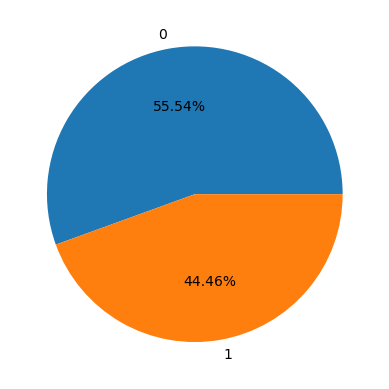

In [23]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


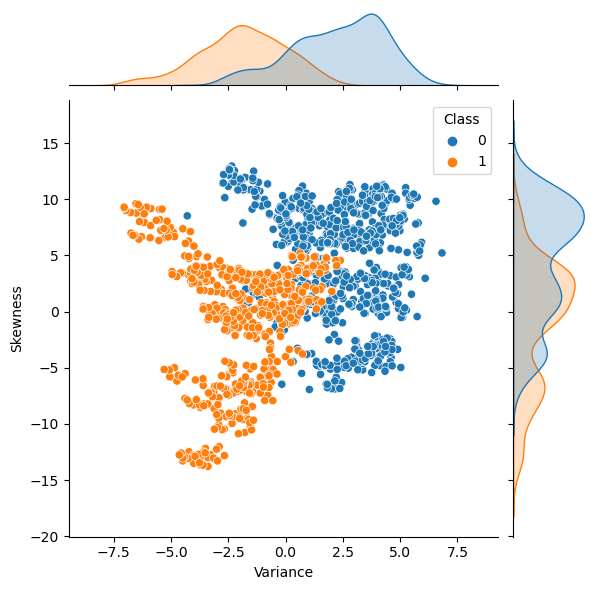

In [27]:
sns.jointplot(x='Variance',y='Skewness', data=df, hue='Class')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

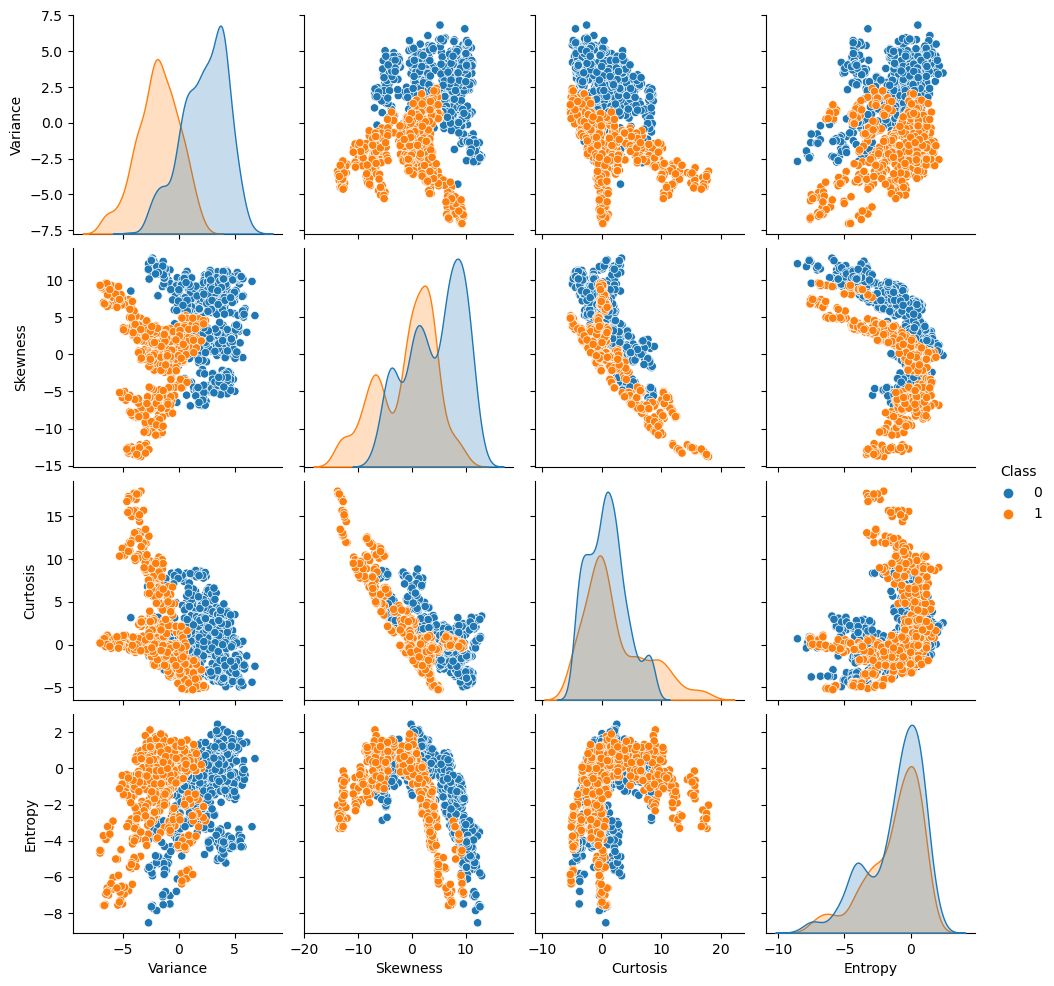

In [29]:
sns.pairplot(df,hue='Class')

##### Cross Validation

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0)

In [32]:
x_train.shape, x_test. shape

((1029, 4), (343, 4))

##### Build the model

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
clf_tree=DecisionTreeClassifier(random_state=0)


In [35]:
# train the algorithm

In [36]:
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

##### Performance Evaluation

In [37]:
y_pred=clf_tree.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [39]:
print(confusion_matrix(y_test,y_pred))# y_test is tested data or known data and y_pred is predicted data

[[191   4]
 [  3 145]]


In [40]:
# first row is of 0 and second row is of 1, 

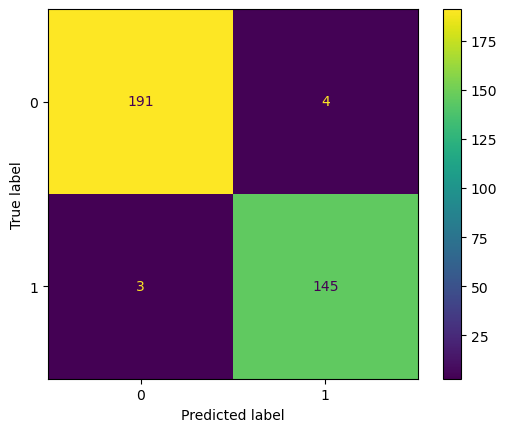

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [42]:
accuracy_score(y_test,y_pred)# accuracy_score find the accuracy

0.9795918367346939

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



##### Visualize the tree

In [48]:
from sklearn.tree import plot_tree

[Text(0.4991319444444444, 0.9444444444444444, 'x[0] <= 0.274\ngini = 0.495\nsamples = 1029\nvalue = [567, 462]'),
 Text(0.3298611111111111, 0.8333333333333334, 'x[1] <= 7.565\ngini = 0.298\nsamples = 495\nvalue = [90, 405]'),
 Text(0.22916666666666666, 0.7222222222222222, 'x[0] <= -0.471\ngini = 0.129\nsamples = 417\nvalue = [29, 388]'),
 Text(0.1111111111111111, 0.6111111111111112, 'x[2] <= 6.746\ngini = 0.061\nsamples = 349\nvalue = [11, 338]'),
 Text(0.05555555555555555, 0.5, 'x[1] <= 7.293\ngini = 0.008\nsamples = 249\nvalue = [1, 248]'),
 Text(0.027777777777777776, 0.3888888888888889, 'gini = 0.0\nsamples = 245\nvalue = [0, 245]'),
 Text(0.08333333333333333, 0.3888888888888889, 'x[3] <= -4.115\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.05555555555555555, 0.2777777777777778, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.1111111111111111, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= -4.8\ngini = 0.18\nsampl

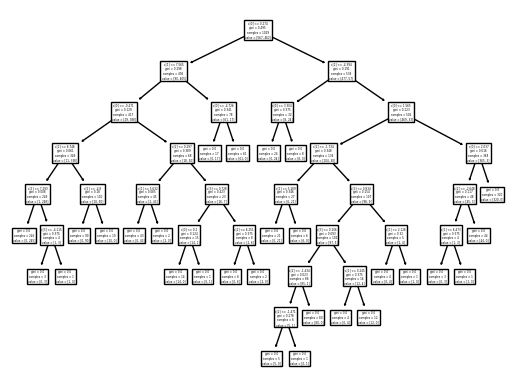

In [49]:
plot_tree(clf_tree)

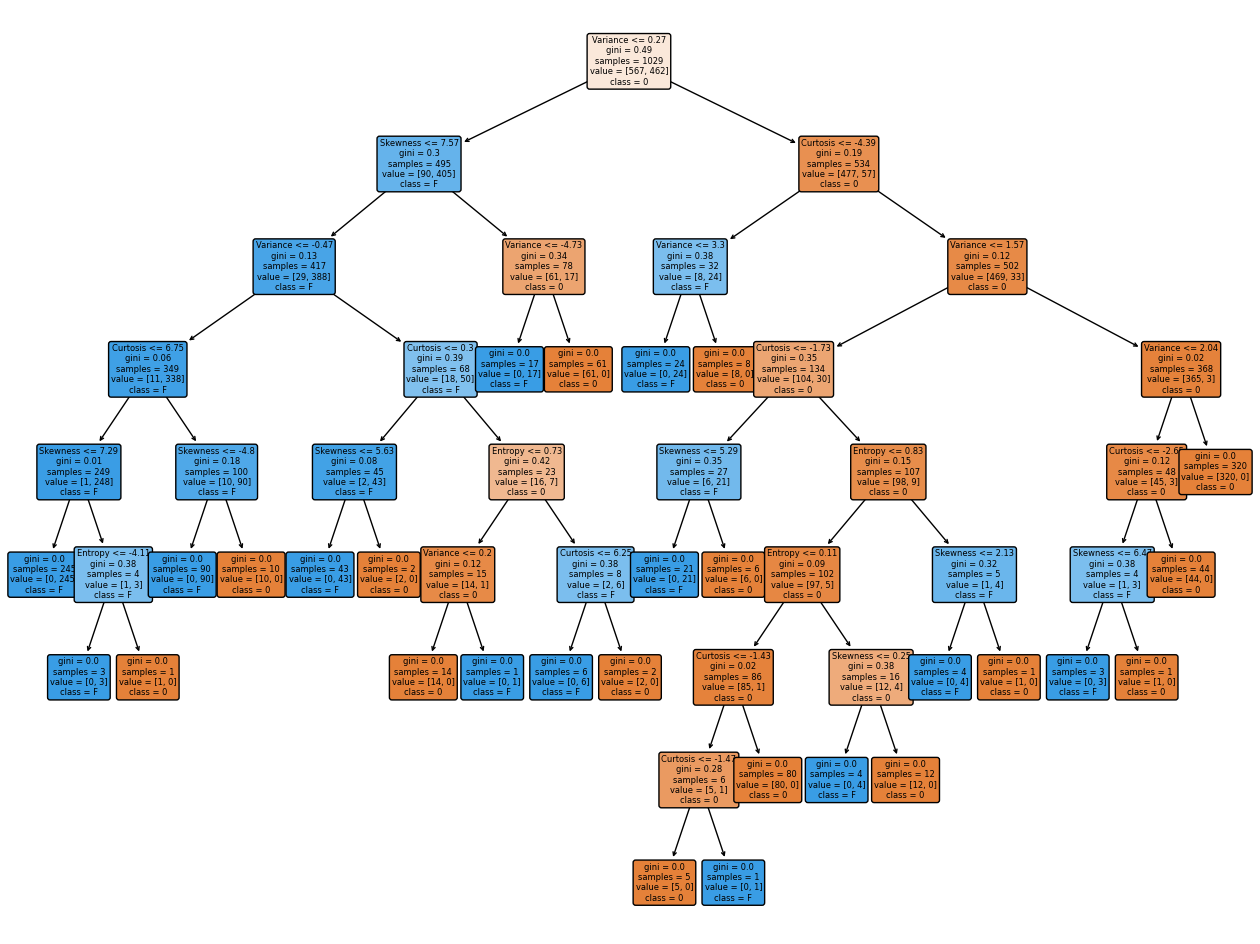

In [51]:
plt.figure(figsize=(16,12))
plot_tree(clf_tree, fontsize=6, feature_names=x.columns, filled=True, precision=2, class_names=['0','F'],rounded=True)
plt.savefig('tree.png')

<BarContainer object of 4 artists>

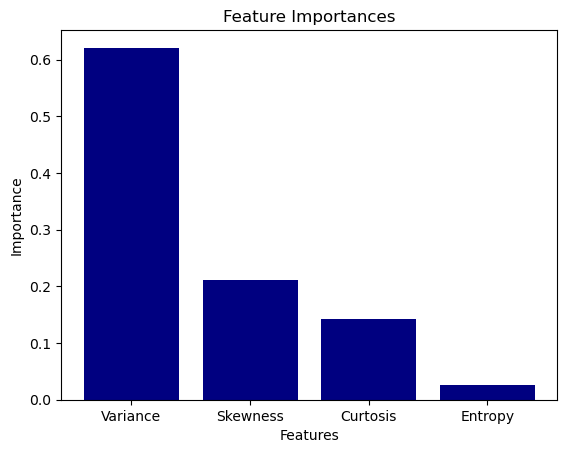

In [53]:
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns, clf_tree.feature_importances_,color='navy')

##### Prediction on unseen data

In [56]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
v=float(input('	Variance'))
s=float(input('Skewness'))
c=float(input('Curtosis'))
e=float(input('Entropy'))
result=pd.DataFrame({
    'Variance':[v],
    'Skwness':[s],
    'Curtosis':[c],
    'Entropy':[e]
})
y_pred=clf_tree_predict(result)
print(y_pred)

In [62]:
v=float(input('	Variance'))
s=float(input('Skewness'))
c=float(input('Curtosis'))
e=float(input('Entropy'))
data=np.array([[v,s,c,e]])
pred=clf_tree.predict(data)
if pred[0]==0:
    print('Original Note')
else:
    print('Fake Note')

	Variance 0.6567
Skewness 3.4774
Curtosis 0.3637
Entropy -3.455


Original Note


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


	Variance 2
Skewness 2
Curtosis 2
Entropy 2


array([2., 2., 2., 2.])

In [75]:
new=pd.DataFrame(data=[[3.45560,9.52280,-4.0112,-3.59440],[0.40614,1.34920,-1.4501,-0.55949],[3.86600,-2.63830,1.9242,0.10645]],columns=x.columns)

In [76]:
new

,Variance,Skewness,Curtosis,Entropy
0,3.45560,9.5228,-4.0112,-3.59440
1,0.40614,1.3492,-1.4501,-0.55949
2,3.86600,-2.6383,1.9242,0.10645


In [82]:
row, col=new.shape
pred=clf_tree.predict(new)
for i in range(row):
    if pred[i]==0:
        
        print('Original Note')
    else:
        print('Fake Note')

Original Note
Fake Note
Original Note


In [83]:
clf_tree.predict(new)

array([0, 1, 0], dtype=int64)

In [ ]:
# we have to use regression algo when we don't have categorical